# BERTopic

This can all be easily done via [BERTopic](https://maartengr.github.io/BERTopic/algorithm/algorithm.html)

In [71]:
import numpy as np
import pandas as pd
from bertopic import BERTopic

from gensim.parsing.preprocessing import (
    preprocess_string, strip_multiple_whitespaces, strip_numeric, strip_punctuation,
    remove_stopwords
)

# Data

In [54]:
data = pd.read_json('../data/bookmarks_data.json').dropna()

In [55]:
data.head()

,title,url,url_text
1,Dashboard | edX,https://courses.edx.org/dashboard,\n Sign in or Register | edX\n
2,GT | GT Login,https://login.gatech.edu/cas/login,GT | GT Login I don't know my GT Account I don...
3,BuzzPort Login,https://buzzport.gatech.edu/cp/home/displaylogin,BuzzPort | Georgia Tech Creating the next Buzz...
4,Georgia Tech :: Account Management :: Passport,https://passport.gatech.edu/home,Georgia Tech :: Account Management :: Passport...
5,Georgia Tech OMS Analytics - Google+,https://plus.google.com/communities/1006647335...,Sign in - Google Accounts \n\n\n Sign in with...


In [56]:
data.shape

(1135, 3)

In [57]:
titles = data['title'].to_list()
content = data['url_text'].to_list()

In [58]:
titles[:10]

['Dashboard | edX',
 'GT | GT Login',
 'BuzzPort Login',
 'Georgia Tech :: Account Management :: Passport',
 'Georgia Tech OMS Analytics - Google+',
 'Georgia Tech Email Services :: Login',
 'CSE 6040 Slack',
 'OMSA Study Group Slack',
 'Team_NOVA Bios - Google Sheets',
 'DVA Project Ideas - Google Docs']

# Fit Model

In [63]:
title_model = BERTopic(
    top_n_words=5,
    n_gram_range=(1,3),
)
topics, probs = title_model.fit_transform(titles)

In [64]:
title_model.get_topic_info()

,Topic,Count,Name
0,-1,244,-1_documentation_python_to_with
1,0,67,0_python_real_real python_testing
2,1,52,1_scikitlearn_pandas_scikitlearn 0203 document...
3,2,47,2_plotly_matplotlib_dash_seaborn
4,3,46,3_airflow_apache airflow_apache_airflow docume...
5,4,36,4_mysql_pypi_sqlalchemy_mongodb
6,5,33,5_jupyter_notebook_jupyter notebook_aws
7,6,33,6_flask_with flask_api_web
8,7,32,7_git_github_markdown_static
9,8,31,8_docker_aws_pycharm_containers


In [67]:
title_model.get_representative_docs(titles)

{2: ['seaborn: statistical data visualization — seaborn 0.9.0 documentation',
  'Letter-value plots: Boxplots for large data',
  'Dash Documentation & User Guide | Plotly'],
 9: ['From Python to Numpy',
  'numpy.vectorize — NumPy v1.16 Manual',
  "Implementing the k-means algorithm with numpy | Frolian's blog"],
 13: ['Passing Multiple Values in MapReduce Part 1: Strings',
  'A MapReduce overview - Towards Data Science',
  'HadoopExamples/src/com/marklogic/mapreduce/examples at master · marklogic/HadoopExamples'],
 7: ['How to Add a New Remote to your Git Repo | Assembla Help Center',
  'Git - gitignore Documentation',
  'Start a new git repository'],
 11: ['EMERITUS Institute of Management - Global IVY Education',
  'Financial Mathematics | Johns Hopkins University Engineering for Professionals',
  "Phi Kappa Phi - Founded in 1897 at the University of Maine Phi Kappa Phi is the nation's oldest largest and most selective honor society for all academic disciplines"],
 0: ['Modules and P

In [65]:
content_model = BERTopic(
    top_n_words=5,
    n_gram_range=(1,3),
)
topics, probs = content_model.fit_transform(content)

In [66]:
content_model.get_topic_info()

,Topic,Count,Name
0,-1,170,-1_the_to_of_and
1,0,66,0_and_to_the_of
2,1,54,1_the_to_in_and
3,2,51,2_the_of_series_time
4,3,46,3_airflow_dag_to_the
5,4,45,4_the_to_you_notebook
6,5,36,5_the_to_d3_we
7,6,36,6_the_to_of_is
8,7,35,7_learning_deep_deep learning_and
9,8,34,8_and_to_the_in


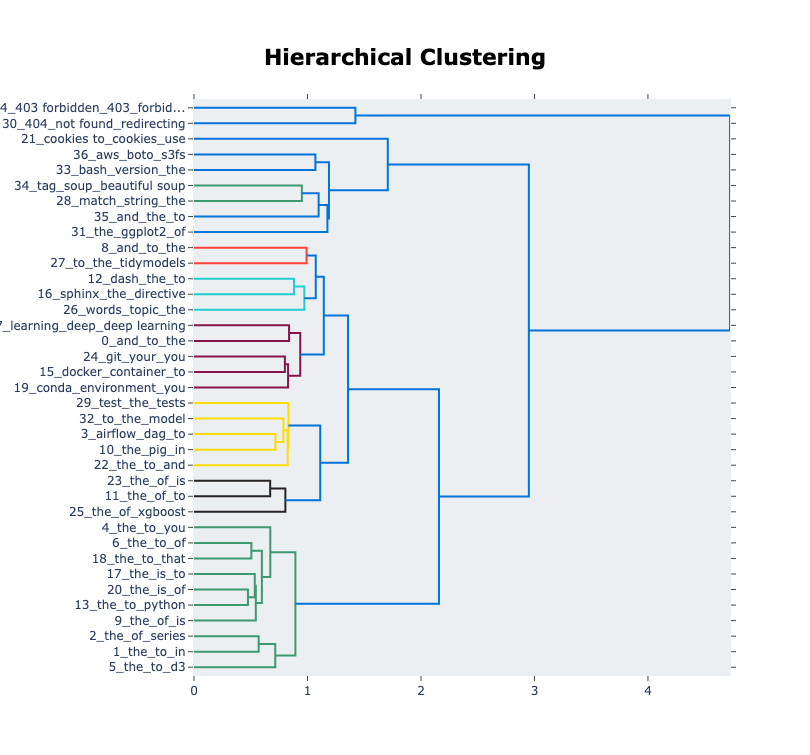

In [70]:
content_model.visualize_hierarchy()

---------

## Preprocess Content

In [76]:
def processor(s):
    return " ".join(preprocess_string(s))

clean_content = [processor(doc) for doc in content]

In [77]:
content_model = BERTopic(
    top_n_words=5,
    n_gram_range=(1,3),
)
topics, probs = content_model.fit_transform(clean_content)

In [78]:
content_model.get_topic_info()

,Topic,Count,Name
0,-1,267,-1_us_python_tag_string
1,0,57,0_flask_api_request_server
2,1,53,1_pig_hadoop_data_java
3,2,46,2_cours_student_program_learn
4,3,46,3_airflow_dag_task_run
5,4,38,4_notebook_jupyt_jupyt notebook_markdown
6,5,35,5_plot_matplotlib_graph_data
7,6,32,6_predictor_model_variabl_data
8,7,32,7_model_forecast_seri_lag
9,8,31,8_test_function_class_python


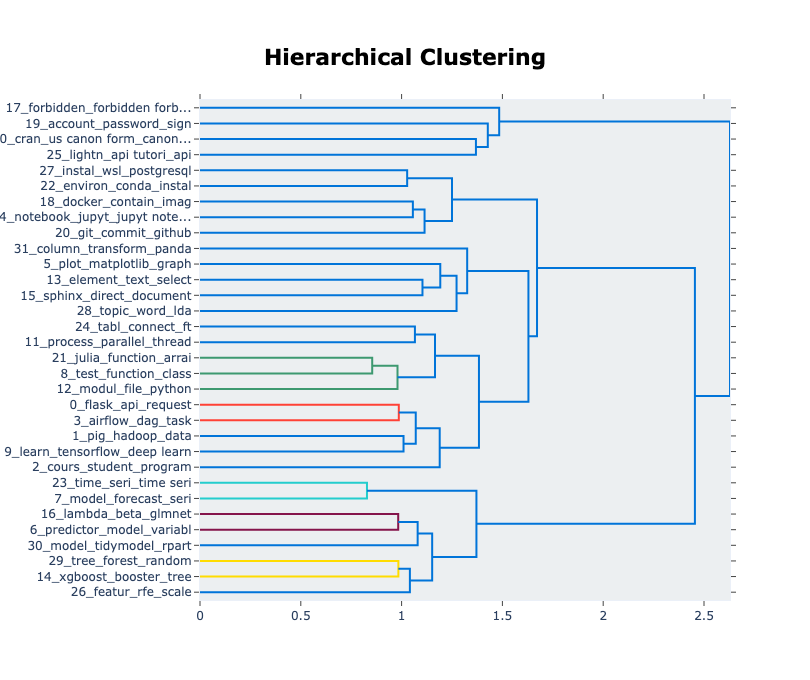

In [79]:
content_model.visualize_hierarchy()